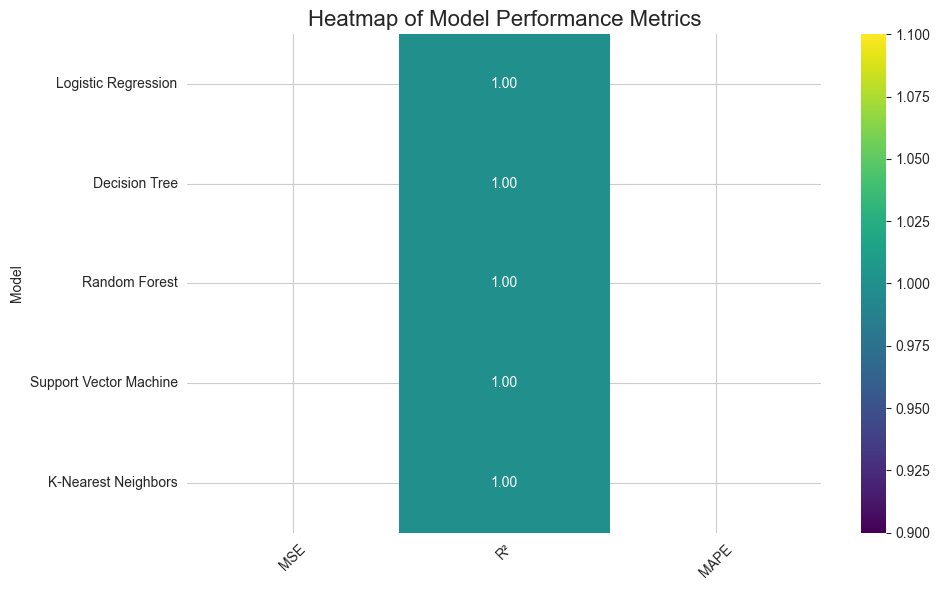

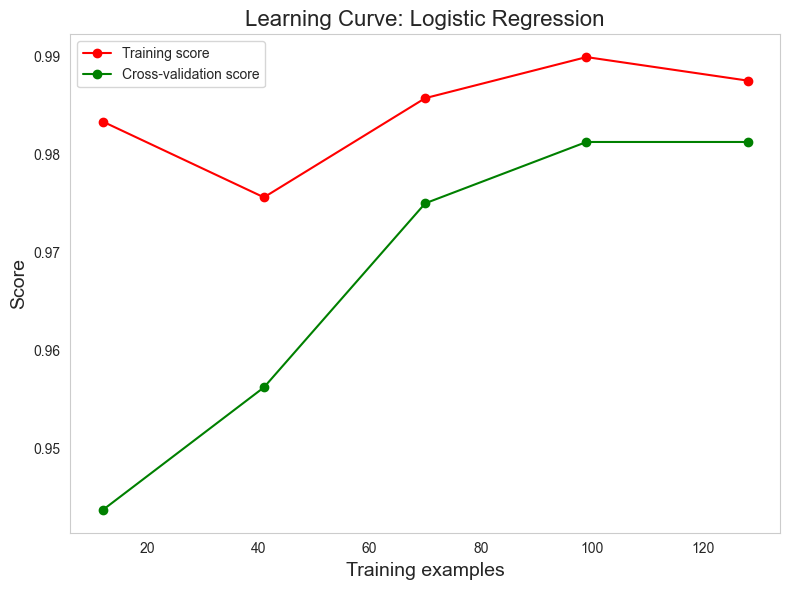

📊 Final Training Score ≈ 98.75%
📊 Final Validation Score ≈ 98.12%
--------------------------------------------------


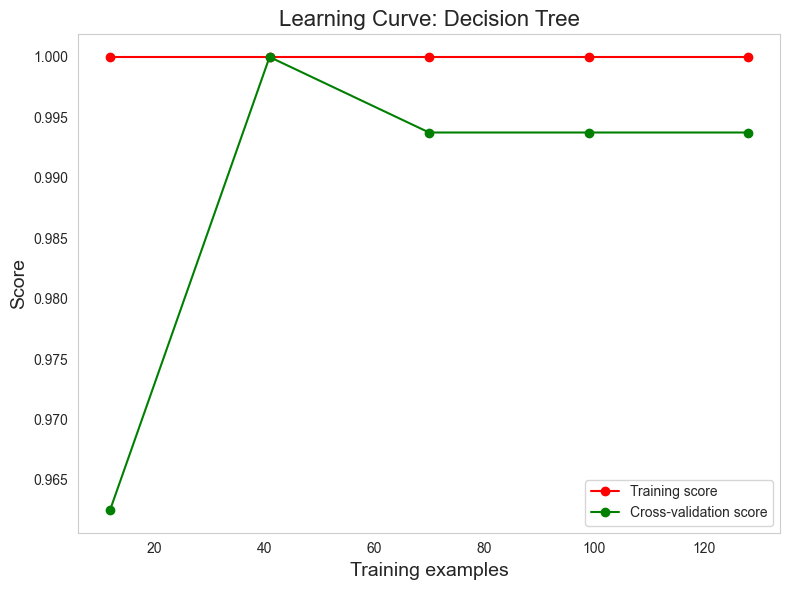

📊 Final Training Score ≈ 100.00%
📊 Final Validation Score ≈ 99.38%
--------------------------------------------------


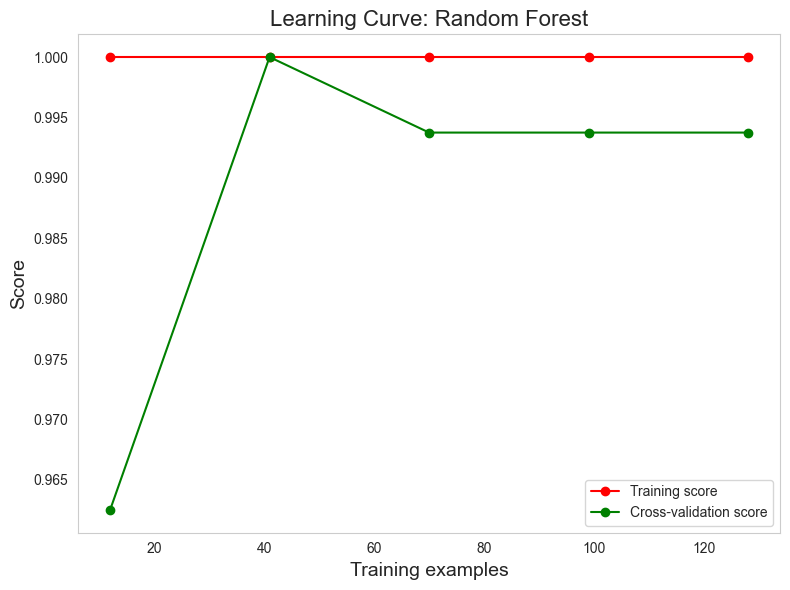

📊 Final Training Score ≈ 100.00%
📊 Final Validation Score ≈ 99.38%
--------------------------------------------------


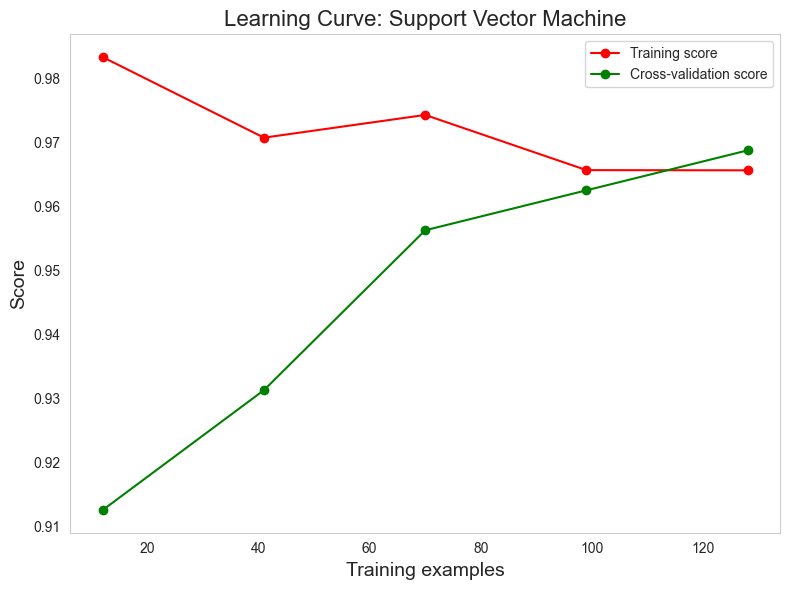

📊 Final Training Score ≈ 96.56%
📊 Final Validation Score ≈ 96.88%
--------------------------------------------------


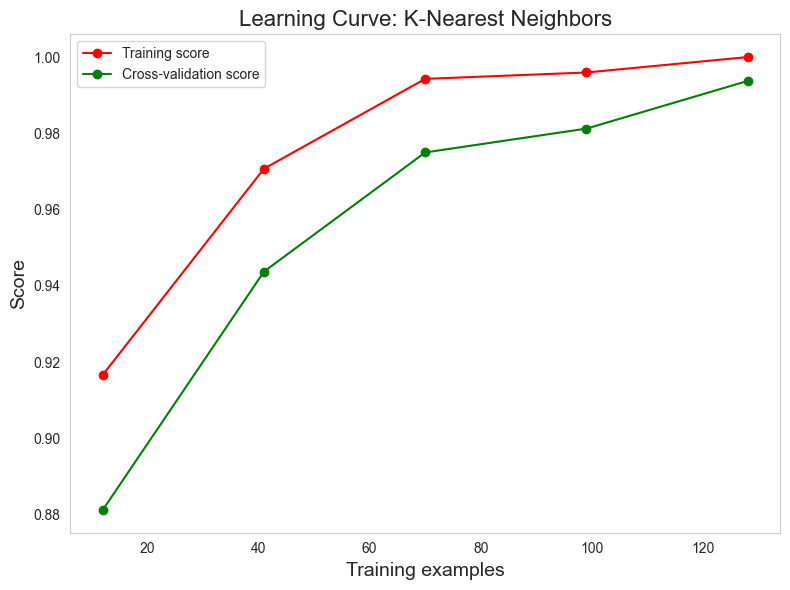

📊 Final Training Score ≈ 100.00%
📊 Final Validation Score ≈ 99.38%
--------------------------------------------------


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('../data/dataset.csv')

# Create avg_attendance and debarred columns
attendance_cols = ['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24',
                   'Jul-24', 'Aug-24', 'Sep-24', 'Oct-24', 'Nov-24', 'Dec-24']
df['avg_attendance'] = df[attendance_cols].mean(axis=1)
df['debarred'] = (df['avg_attendance'] < 75).astype(int)

# Features and labels
X = df[['avg_attendance']]
y = df['debarred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'R²': [], 'MAPE': []}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R²'].append(r2)
    results['MAPE'].append(mape)

# Create DataFrame
results_df = pd.DataFrame(results)

# Set seaborn style
sns.set_style("whitegrid")

# --- 1. Heatmap for Model Performance ---

# Normalize values for better color scaling
normalized_results = results_df.copy()
normalized_results['MSE'] = (normalized_results['MSE'] - normalized_results['MSE'].min()) / (normalized_results['MSE'].max() - normalized_results['MSE'].min())
normalized_results['MAPE'] = (normalized_results['MAPE'] - normalized_results['MAPE'].min()) / (normalized_results['MAPE'].max() - normalized_results['MAPE'].min())

# Pivot for heatmap
heatmap_data = normalized_results.set_index('Model')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar=True)
plt.title('Heatmap of Model Performance Metrics', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 2. Learning Curves + Smart Summary ---

def plot_learning_curve_with_summary(model, title, X, y, cv=5, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 6))
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(title, fontsize=16)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.legend(loc="best")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # --- Smart Summary
    final_train_score = train_scores_mean[-1] * 100
    final_val_score = test_scores_mean[-1] * 100
    print(f"📊 Final Training Score ≈ {final_train_score:.2f}%")
    print(f"📊 Final Validation Score ≈ {final_val_score:.2f}%")
    print("-" * 50)

# Plot learning curves for each model
for model_name, model in models.items():
    plot_learning_curve_with_summary(model, f'Learning Curve: {model_name}', X, y)
